<a href="https://colab.research.google.com/github/vard-uhi/statistics-with-python-tasks/blob/main/Confidence_intervals_with_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving nhanes_2015_2016.csv to nhanes_2015_2016.csv


In [3]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['nhanes_2015_2016.csv']))

In [4]:
df = raw_data.copy()

In [5]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [54]:
#sample the dataset to women between 35 and 50
female_age_filter = df[(df['RIAGENDR'] == 2 ) & (df['RIDAGEYR'] >= 35) & (df['RIDAGEYR'] <=50)]
female_age_filter.reset_index(inplace = True, drop = True)

In [55]:
#group of women who are currently married 
female_married = female_age_filter[female_age_filter['DMDMARTL'] == 1]
female_married.reset_index(inplace = True, drop = True)

In [56]:
#group of woman women who are not currently married
female_not_married = female_age_filter[female_age_filter['DMDMARTL'].isin([2,3,4,5,6])]
female_not_married.reset_index(inplace = True, drop = True)

Merried

In [58]:
#proportion of women who have completed college among women who are currently married
proportion_married = sum(female_married['DMDEDUC2'] == 5) / len(female_married)
proportion_married

0.36080178173719374

In [60]:
#standard deviation
sd_married = proportion_married * (1-proportion_married)
sd_married

0.23062385603246013

In [61]:
#number of observations
n_married = len(female_age_filter['DMDEDUC2'])
n_married

787

In [62]:
print('Lower Boundary: ', proportion_married - 1.96 * np.sqrt((sd_married/n_married)))
print('Upper Boundary: ', proportion_married + 1.96 * np.sqrt((sd_married/n_married)))

Lower Boundary:  0.3272495958045783
Upper Boundary:  0.3943539676698092


In [63]:
import statsmodels.api as sm

In [64]:
ci_low, ci_upp = sm.stats.proportion_confint(proportion_married * n_married, n_married, alpha=0.05, method='normal')

In [65]:
ci_low, ci_upp

(0.3272502123338684, 0.39435335114051917)

In [66]:
ci_upp-ci_low

0.06710313880665075

Not Married

In [68]:
#population proportion
proportion_not_married = sum(female_not_married['DMDEDUC2']==5)/len(female_not_married)
proportion_not_married

0.21301775147928995

In [69]:
n_not_married = len(female_not_married['DMDEDUC2'])
n_not_married

338

In [70]:
#standard error
se_not_married = np.sqrt((proportion_not_married*(1-proportion_not_married))/n_not_married)
se_not_married

0.022270605048202215

In [71]:
print('Lower Boundary: ', proportion_not_married - 1.96 * se_not_married)
print('Upper Boundary: ', proportion_not_married + 1.96 * se_not_married)

Lower Boundary:  0.1693673655848136
Upper Boundary:  0.25666813737376626


In [72]:
ci_low, ci_upp = sm.stats.proportion_confint(proportion_not_married * n_not_married, n_not_married, alpha=0.05, method='normal')

In [73]:
ci_low, ci_upp

(0.16936816767089768, 0.2566673352876822)

In [75]:
ci_upp - ci_low

0.08729916761678452

__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

Sample 1 has a wider confidence interval, it has more than 2 times more data. However, STD is lower, which means data is not that spread and because of it results of the confidence intervals of 2 samples has close confidence interval range.

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

A higher proportion of women who are currently married have completed their college in comparison to women who are not currently married. This is a significant difference between our 2 groups and we are 95% sure in the results.

## Question 2

Construct 95% confidence intervals for the proportion of smokers who are female, and for the proportion of smokers who are male.  Then construct a 95% confidence interval for the difference between these proportions.

In [76]:
df_smokers = df[df['SMQ020'] == 1]
df_smokers.reset_index(inplace=True, drop=True)

In [77]:
smokers_gender = df_smokers['RIAGENDR']

In [78]:
smokers_gender = smokers_gender[~smokers_gender.isna()]
smokers_gender.reset_index(inplace=True, drop=True)

In [79]:
n_smokers = len(smokers_gender)
n_smokers

2319

In [80]:
n_smokers_male = sum(smokers_gender == 1)
n_smokers_male

1413

In [81]:
n_smokers_female = sum(smokers_gender == 2)
n_smokers_female

906

In [82]:
proportion_smokers_male = (n_smokers_male / n_smokers)
proportion_smokers_male

0.6093143596377749

In [83]:
proportion_smokers_female = (n_smokers_female / n_smokers)
proportion_smokers_female

0.3906856403622251

In [84]:
#Standard error
se_smokers_male = np.sqrt((proportion_smokers_male * (1 - proportion_smokers_male)) / n_smokers_male)
se_smokers_male

0.012979661011895138

In [85]:
#standard error
se_smokers_female = np.sqrt((proportion_smokers_female * (1 - proportion_smokers_female))/ n_smokers_female)
se_smokers_female

0.016209526631489866

In [86]:
print('Lower Boundary Male: ', proportion_smokers_male -1.96 * se_smokers_male)
print('Upper Boundary Male: ', proportion_smokers_male +1.96 * se_smokers_male)

Lower Boundary Male:  0.5838742240544604
Upper Boundary Male:  0.6347544952210894


In [87]:
print('Lower Boundary Female: ', proportion_smokers_female - 1.96 * se_smokers_female)
print('Upper Boundary Female: ', proportion_smokers_female + 1.96 * se_smokers_female)

Lower Boundary Female:  0.35891496816450497
Upper Boundary Female:  0.4224563125599452


In [88]:
proportion_smokers_gender_diff = proportion_smokers_male - proportion_smokers_female
proportion_smokers_gender_diff

0.21862871927554983

In [89]:
se_proportion_smokers_diff = np.sqrt((se_smokers_male**2) + (se_smokers_female**2))

In [90]:
print('Lower Boundary Gender Difference: ', proportion_smokers_gender_diff - 1.96 * se_proportion_smokers_diff)
print('Upper Boundary Gender Difference: ', proportion_smokers_gender_diff + 1.96 * se_proportion_smokers_diff)

Lower Boundary Gender Difference:  0.17792766142206878
Upper Boundary Gender Difference:  0.2593297771290309


In [91]:
0.2593297771290309-0.17792766142206878


0.0814021157069621

__Q2a.__ Discuss why it may be relevant to report the proportions of smokers who are female and male, and contrast this to reporting the proportions of males and females who smoke.

It is relevant to report the proportions of smokers who are female and male to make comparisons between these 2 groups.

__Q2b.__ How does the width of the confidence interval for the difference of the two proportions compare to the widths of the confidence intervals for each proportion separately?

The confidence interval for the difference of the two proportions is wider than the confidence intervals for each proportion separately.

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [92]:
height_cm = df['BMXHT']

In [93]:
height_cm = height_cm[~height_cm.isna()]
height_cm.reset_index(inplace=True, drop=True)

In [94]:
np.mean(height_cm)

166.14283447911131

In [95]:
height_inches = height_cm/2.54

In [96]:
height_inches = height_inches[~height_inches.isna()]
height_inches.reset_index(inplace=True, drop=True)

In [97]:
np.mean(height_inches)

65.41056475555557

In [98]:
n_height_inches = len(height_inches)
n_height_inches

5673

In [99]:
std_height_inches = np.std(height_inches)
std_height_inches

3.9678642989700457

In [100]:
print('Lower Boundary Inches: ', np.mean(height_inches) - 1.96 * (std_height_inches/np.sqrt(n_height_inches)))
print('Upper Boundary Inches: ', np.mean(height_inches) + 1.96 * (std_height_inches/np.sqrt(n_height_inches)))

Lower Boundary Inches:  65.30731084935765
Upper Boundary Inches:  65.51381866175349


In [101]:
sm.stats.DescrStatsW(height_inches).tconfint_mean()

(65.30728160535489, 65.51384790575659)

In [102]:
print('Lower Boundary cm: ', (np.mean(height_inches) - 1.96 * (std_height_inches/np.sqrt(n_height_inches)))*2.54)
print('Upper Boundary cm: ', (np.mean(height_inches) + 1.96 * (std_height_inches/np.sqrt(n_height_inches)))*2.54)

Lower Boundary cm:  165.88056955736843
Upper Boundary cm:  166.40509940085386


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

Both confidence intervals are very narrow and the sample mean for inches and cms fall inside the population confidence interval.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [6]:
df["RIDAGEYR"].describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [8]:
df["Age_Group"] = pd.cut(df.RIDAGEYR, [18,28,38,48,58,68,78,88])

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [19]:
first_systolic = df['BPXSY1']
second_systolic = df['BPXSY2']
difference_systolic = first_systolic - second_systolic

In [23]:
first_systolic = first_systolic[~first_systolic.isna()]
first_systolic.reset_index(inplace=True, drop=True)

In [24]:
second_systolic = second_systolic[~second_systolic.isna()]
second_systolic.reset_index(inplace=True, drop=True)

In [25]:
difference_systolic = difference_systolic[~difference_systolic.isna()]
difference_systolic.reset_index(inplace=True, drop=True)

In [40]:
#first systolic blood pressure
lower, upper = sm.stats.DescrStatsW(first_systolic).tconfint_mean()
print("Lower Boundary:", lower, "\n", "Upper Boundary:", upper, "\n", "Diff:", abs(upper)-abs(lower) )

Lower Boundary: 124.59163222328895 
 Upper Boundary: 125.57759569746646 
 Diff: 0.9859634741775096


In [41]:
#second systolic blood pressure
lower, upper = sm.stats.DescrStatsW(second_systolic).tconfint_mean()
print("Lower Boundary:", lower, "\n", "Upper Boundary:", upper, "\n", "Diff:", abs(upper)-abs(lower) )

Lower Boundary: 124.29482629577244 
 Upper Boundary: 125.27120803123749 
 Diff: 0.9763817354650541


In [42]:
#difference
lower, upper = sm.stats.DescrStatsW(difference_systolic).tconfint_mean()
print("Lower Boundary:", lower, "\n", "Upper Boundary:", upper, "\n", "Diff:", abs(upper)-abs(lower) )

Lower Boundary: 0.5399696008802797 
 Upper Boundary: 0.8100024609561889 
 Diff: 0.2700328600759092


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

Within-subject difference is narrower.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [45]:
smokers = df[df['SMQ020'] ==1]['RIDAGEYR']
smokers = smokers[~smokers.isna()]
smokers.reset_index(inplace=True, drop=True)

In [46]:
df['SMQ020'].unique()

array([1, 2, 7, 9])

In [47]:
non_smokers = df[df['SMQ020'] !=1]['RIDAGEYR']
non_smokers = non_smokers[~non_smokers.isna()]
non_smokers.reset_index(inplace=True, drop=True)

In [49]:
smokers_temp = sm.stats.DescrStatsW(smokers)
non_smokers_temp = sm.stats.DescrStatsW(non_smokers)

compare_means = sm.stats.CompareMeans(smokers_temp, non_smokers_temp)
lower, upper = compare_means.tconfint_diff(usevar='pooled')
print("pooled: ", lower, ",", upper)

pooled:  5.833562476381499 , 7.746041103858306


Q6a. Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.



In [50]:
smokers.describe()

count    2319.000000
mean       52.096593
std        17.461141
min        18.000000
25%        37.000000
50%        54.000000
75%        66.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [51]:
non_smokers.describe()

count    3416.000000
mean       45.306792
std        18.568337
min        18.000000
25%        29.000000
50%        44.000000
75%        60.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


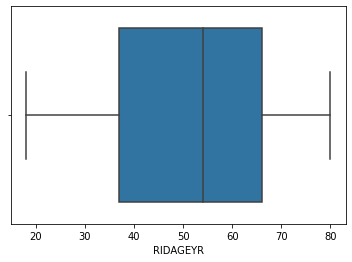

In [52]:
sns.boxplot(smokers)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


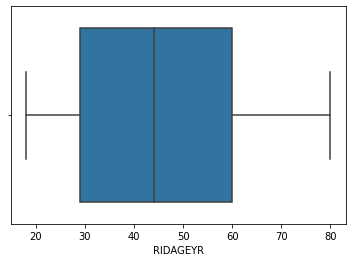

In [53]:
sns.boxplot(non_smokers)

Q6b. Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?